In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('mode.chained_assignment',None)

In [2]:
data = pd.read_excel('E:/MLProjects/Loan Foreclosure Project/NBFC Loan Transaction Data.xlsx')

In [3]:
data.shape

(20012, 53)

In [4]:
data.describe()

,AGREEMENTID,BALANCE_EXCESS,BALANCE_TENURE,COMPLETED_TENURE,CURRENT_INTEREST_RATE,CURRENT_INTEREST_RATE_MAX,CURRENT_INTEREST_RATE_MIN,CURRENT_INTEREST_RATE_CHANGES,CURRENT_TENOR,CUSTOMERID,...,ORIGNAL_TENOR,OUTSTANDING_PRINCIPAL,PAID_INTEREST,PAID_PRINCIPAL,PRE_EMI_DUEAMT,PRE_EMI_OS_AMOUNT,PRE_EMI_RECEIVED_AMT,SCHEMEID,MOB,FORECLOSURE
count,2.001200e+04,2.001200e+04,20012.000000,20012.000000,20012.000000,20012.000000,20012.000000,20012.000000,20012.000000,1.973100e+04,...,20012.000000,2.001200e+04,2.001200e+04,2.001200e+04,2.001200e+04,2.001200e+04,2.001200e+04,1.973100e+04,20012.000000,20012.000000
mean,1.123665e+07,7.899598e+04,172.824605,17.269089,14.781931,14.900248,14.301873,0.758095,190.093694,1.201741e+07,...,183.297322,5.212982e+06,9.890547e+05,8.667637e+05,5.780447e+04,2.594779e+02,5.754499e+04,1.090122e+07,18.813612,0.089696
std,9.626440e+03,1.348636e+06,64.004484,16.486279,2.485858,2.480029,2.677014,1.134323,58.559953,9.490084e+03,...,44.600262,1.152135e+07,3.026053e+06,3.469758e+07,3.776647e+05,1.096744e+04,3.769718e+05,8.890519e+01,16.541875,0.285753
min,1.122000e+07,0.000000e+00,0.000000,0.000000,9.901017,10.425409,-5.056636,0.000000,6.000000,1.200100e+07,...,14.000000,-7.506479e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.090110e+07,0.000000,0.000000
25%,1.122833e+07,0.000000e+00,136.000000,6.000000,12.797658,13.109796,12.423092,0.000000,166.000000,1.200921e+07,...,180.000000,1.428919e+06,1.253319e+05,2.341834e+04,4.768264e+03,0.000000e+00,4.755012e+03,1.090111e+07,7.000000,0.000000
50%,1.123661e+07,0.000000e+00,174.000000,12.000000,14.545631,14.670486,13.734072,0.000000,180.000000,1.201740e+07,...,180.000000,2.394655e+06,3.097248e+05,7.878650e+04,1.069602e+04,0.000000e+00,1.067945e+04,1.090126e+07,13.000000,0.000000
75%,1.124496e+07,5.742235e+01,216.000000,25.000000,16.231176,16.543314,16.168748,2.000000,228.000000,1.202562e+07,...,228.000000,4.551204e+06,7.954680e+05,2.917810e+05,3.187879e+04,0.000000e+00,3.180536e+04,1.090129e+07,26.000000,0.000000
max,1.125335e+07,7.555600e+07,674.000000,98.000000,25.095895,37.456560,24.034626,9.000000,713.000000,1.203390e+07,...,300.000000,3.818367e+08,1.230362e+08,4.885217e+09,3.177540e+07,1.074264e+06,3.177540e+07,1.090146e+07,98.000000,1.000000


# EDA & Feature Engineering

Checking for Missing values if any

In [5]:
data.isna().sum()

AGREEMENTID                                0
AUTHORIZATIONDATE                          0
BALANCE_EXCESS                             0
BALANCE_TENURE                             0
CITY                                       0
COMPLETED_TENURE                           0
CURRENT_INTEREST_RATE                      0
CURRENT_INTEREST_RATE_MAX                  0
CURRENT_INTEREST_RATE_MIN                  0
CURRENT_INTEREST_RATE_CHANGES              0
CURRENT_TENOR                              0
CUSTOMERID                               281
DIFF_AUTH_INT_DATE                         0
DIFF_CURRENT_INTEREST_RATE_MAX_MIN         0
DIFF_EMI_AMOUNT_MAX_MIN                   89
DIFF_ORIGINAL_CURRENT_INTEREST_RATE        0
DIFF_ORIGINAL_CURRENT_TENOR                0
DPD                                        0
DUEDAY                                     0
EMI_AMOUNT                                 0
EMI_DUEAMT                                 0
EMI_OS_AMOUNT                              0
EMI_RECEIV

Removing features with highest missing values and other features which are not relevant to the use case.

In [6]:
drop_cols = ['AGREEMENTID','AUTHORIZATIONDATE','CITY','CUSTOMERID','CURRENT_INTEREST_RATE_MAX','CURRENT_INTEREST_RATE_MIN',
            'NPA_IN_LAST_MONTH','NPA_IN_CURRENT_MONTH','SCHEMEID','MAX_EMI_AMOUNT','MIN_EMI_AMOUNT','CURRENT_INTEREST_RATE',
            'ORIGNAL_INTEREST_RATE','ORIGNAL_TENOR','CURRENT_TENOR','INTEREST_START_DATE','MOB','EMI_DUEAMT','EMI_RECEIVED_AMT',
            'EMI_OS_AMOUNT','EXCESS_AVAILABLE','EXCESS_ADJUSTED_AMT','BALANCE_EXCESS']
data.drop(columns=drop_cols,axis=1,inplace=True)

In [7]:
# converting the %values to decimals.
data['NET_LTV'] = data['NET_LTV']/100

In [8]:
#FOIR stands for Fixed Obligations to Income ratio which must range between 0 to 1
data['FOIR'] = data['FOIR'].apply(lambda x:0 if x<0 else (1 if x>1 else x ))

Changing the datatypes

In [9]:
data['FORECLOSURE'] = data['FORECLOSURE'].astype(object)
data['PRODUCT'] = data['PRODUCT'].astype(object)
data['LATEST_TRANSACTION_MONTH'] = data['LATEST_TRANSACTION_MONTH'].astype(object)

Handling missing values

In [10]:
data['LAST_RECEIPT_AMOUNT'] = data['LAST_RECEIPT_AMOUNT'].fillna(data['LAST_RECEIPT_AMOUNT'].median())
data['DIFF_EMI_AMOUNT_MAX_MIN'] = data['DIFF_EMI_AMOUNT_MAX_MIN'].fillna(data['DIFF_EMI_AMOUNT_MAX_MIN'].median())

In [11]:
data.drop(['LAST_RECEIPT_DATE'],axis=1,inplace=True)

Splitting dataset to numerical and categorical.

In [12]:
num_data = data.select_dtypes(include=[np.number])
cat_data = data.select_dtypes(exclude=[np.number])

In [13]:
num_data.shape

(20012, 26)

In [14]:
cat_data.shape

(20012, 3)

In [15]:
cat_data['LATEST_TRANSACTION_MONTH'] = cat_data['LATEST_TRANSACTION_MONTH'].fillna(cat_data['LATEST_TRANSACTION_MONTH'].mode()[0])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023987138688>,
      dtype=object)

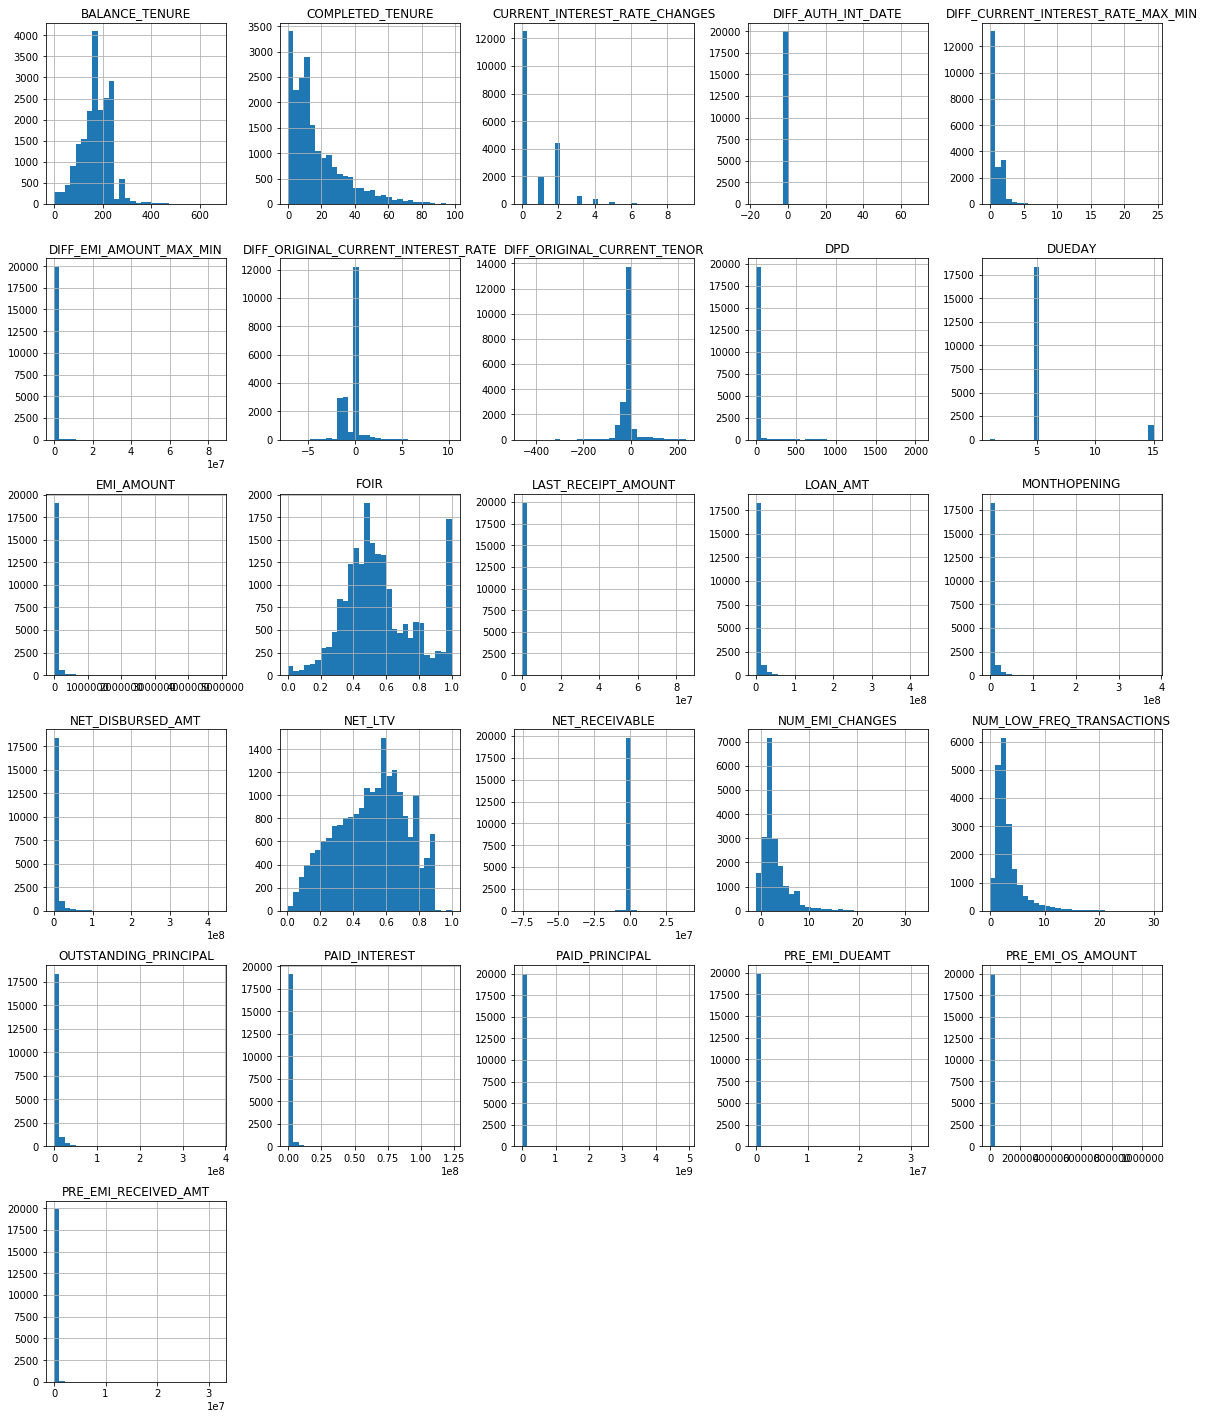

In [16]:
num_data.hist(bins=30,figsize=(20,25))

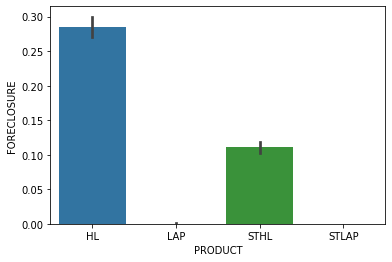

In [17]:
sns.barplot(x='PRODUCT',y='FORECLOSURE',data=data)

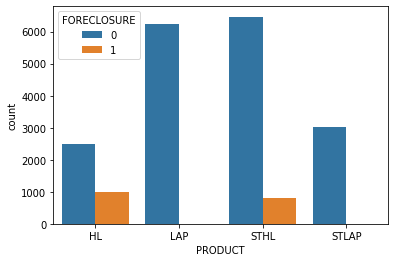

In [18]:
sns.countplot(x='PRODUCT',hue='FORECLOSURE',data=data)

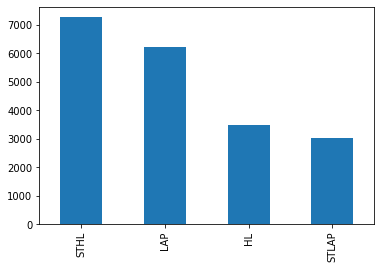

In [19]:
data['PRODUCT'].value_counts().plot(kind='bar')

Key takeaways from <b>EDA</b>

1. More number fof customers have taken STHL(Short Term Home Loan).
2. Foreclosures have been high in case of HL(Home Loans) followed by STLAP(Short Term Loan Against Property)
3. In most of the scenarios, FOIR is ranging between 0.4 to 0.6. i.e Nearly 40%-60% of customers income is deducted
   for fixed obligations such as EMI.
4. Net_LTV i.e Loan-to-Value ratio is ranging between 0.5 to 0.7 in most cases which implies that customer requests loan amount
   almost nearer to the appraised value.

Handling outliers using capping method.

In [20]:
for col in num_data.columns:
    quantiles = num_data[col].quantile([0.25,0.75]).values
    cap = num_data[col].quantile([0.05,0.95]).values
    num_data[col][num_data[col] <= quantiles[0]] = cap[0]
    num_data[col][num_data[col] >= quantiles[1]] = cap[1]

In [21]:
#dropping the columns which are irrelavant
num_data.drop(columns=['DIFF_AUTH_INT_DATE','DPD','PRE_EMI_OS_AMOUNT'],inplace=True)

In [43]:
#scaling the data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_data_scaled = scaler.fit_transform(num_data)

In [44]:
#checking VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(num_data_scaled,i) for i in range(num_data_scaled.shape[1])]
vif['Features'] = num_data.columns
vif

,VIF,Features
0,1.624836,BALANCE_TENURE
1,2.240952,COMPLETED_TENURE
2,2.249267,CURRENT_INTEREST_RATE_CHANGES
3,2.670996,DIFF_EMI_AMOUNT_MAX_MIN
4,2.316808,DIFF_ORIGINAL_CURRENT_TENOR
5,6.730976,EMI_AMOUNT
6,1.333296,FOIR
7,6.015480,LAST_RECEIPT_AMOUNT
8,1.166699,NET_LTV
9,1.126672,NET_RECEIVABLE


In [24]:
num_data.drop(columns=['DUEDAY'],inplace=True)

In [27]:
num_data.drop(columns=['PRE_EMI_DUEAMT','PRE_EMI_RECEIVED_AMT'],inplace=True)

In [30]:
num_data.drop(columns=['NET_DISBURSED_AMT'],inplace=True)

In [33]:
num_data.drop(columns=['MONTHOPENING'],inplace=True)

In [36]:
num_data.drop(columns=['LOAN_AMT'],inplace=True)

In [39]:
num_data.drop(columns=['DIFF_CURRENT_INTEREST_RATE_MAX_MIN'],inplace=True)

In [39]:
num_data.drop(columns=['EMI_AMOUNT'],inplace=True)

In [42]:
num_data.drop(columns=['DIFF_ORIGINAL_CURRENT_INTEREST_RATE'],inplace=True)

From code no [24] to [43] the features have been removed based on VIF>5 in every iteration

In [45]:
num_data_scaled = pd.DataFrame(num_data_scaled,columns=num_data.columns)

In [46]:
num_data_scaled

,BALANCE_TENURE,COMPLETED_TENURE,CURRENT_INTEREST_RATE_CHANGES,DIFF_EMI_AMOUNT_MAX_MIN,DIFF_ORIGINAL_CURRENT_TENOR,EMI_AMOUNT,FOIR,LAST_RECEIPT_AMOUNT,NET_LTV,NET_RECEIVABLE,NUM_EMI_CHANGES,NUM_LOW_FREQ_TRANSACTIONS,OUTSTANDING_PRINCIPAL,PAID_INTEREST,PAID_PRINCIPAL
0,-1.412103,1.630326,0.050521,1.724856,0.692347,1.711600,0.089319,1.720902,-0.426162,0.72186,-0.744605,-1.037269,-0.753419,1.718136,1.727863
1,-1.412103,1.630326,-0.708510,-0.698768,0.692347,1.711600,0.089319,1.720902,1.309354,0.72186,-0.744605,-1.037269,1.714859,1.718136,1.727863
2,1.352109,1.630326,1.568583,1.724856,-1.656895,-0.421281,1.528187,-0.472639,-0.003926,0.72186,-0.744605,1.255020,-0.420384,1.718136,1.727863
3,-1.412103,1.630326,1.568583,1.724856,0.692347,1.711600,0.089319,1.720902,1.309354,0.72186,0.134979,1.255020,-0.753419,1.718136,1.727863
4,0.554321,1.630326,1.568583,-0.698768,-1.656895,1.711600,1.528187,1.720902,-1.425982,0.72186,-0.744605,1.255020,1.714859,1.718136,1.727863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20007,1.352109,-0.963773,-0.708510,-0.524513,0.692347,-0.780495,1.528187,-0.723980,0.548529,0.72186,-0.744605,-1.037269,1.714859,-0.726261,-0.649079
20008,1.352109,-0.963773,-0.708510,-0.698768,0.692347,-0.780495,-0.054568,-0.723980,-0.283858,0.72186,-0.744605,-1.037269,-0.519868,-0.726261,-0.649079
20009,-1.412103,-0.963773,-0.708510,-0.698768,0.692347,-0.780495,0.233206,-0.723980,-1.425982,0.72186,-0.744605,-1.037269,1.714859,-0.726261,-0.649079
20010,-1.412103,-0.963773,-0.708510,-0.698768,0.692347,-0.614500,-0.126511,-0.624456,-0.037066,0.72186,-0.744605,-1.037269,1.714859,-0.726261,-0.649079


In [47]:
num_data_scaled.shape

(20012, 15)

In [48]:
cat_data.drop(['LATEST_TRANSACTION_MONTH'],axis=1,inplace=True)

In [49]:
cat_data_new = pd.get_dummies(cat_data,columns=['PRODUCT'],drop_first=True)

In [50]:
cat_data_new

,FORECLOSURE,PRODUCT_LAP,PRODUCT_STHL,PRODUCT_STLAP
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
20007,0,0,0,0
20008,0,0,0,0
20009,0,1,0,0
20010,0,1,0,0


In [51]:
num_data_scaled.dtypes

BALANCE_TENURE                   float64
COMPLETED_TENURE                 float64
CURRENT_INTEREST_RATE_CHANGES    float64
DIFF_EMI_AMOUNT_MAX_MIN          float64
DIFF_ORIGINAL_CURRENT_TENOR      float64
EMI_AMOUNT                       float64
FOIR                             float64
LAST_RECEIPT_AMOUNT              float64
NET_LTV                          float64
NET_RECEIVABLE                   float64
NUM_EMI_CHANGES                  float64
NUM_LOW_FREQ_TRANSACTIONS        float64
OUTSTANDING_PRINCIPAL            float64
PAID_INTEREST                    float64
PAID_PRINCIPAL                   float64
dtype: object

In [52]:
cat_data_new = cat_data_new.astype('int')

Now combining both Numerical and Categorical features for Model building purpose.

In [53]:
loan_data = pd.concat([num_data_scaled,cat_data_new],axis=1)

In [54]:
loan_data

,BALANCE_TENURE,COMPLETED_TENURE,CURRENT_INTEREST_RATE_CHANGES,DIFF_EMI_AMOUNT_MAX_MIN,DIFF_ORIGINAL_CURRENT_TENOR,EMI_AMOUNT,FOIR,LAST_RECEIPT_AMOUNT,NET_LTV,NET_RECEIVABLE,NUM_EMI_CHANGES,NUM_LOW_FREQ_TRANSACTIONS,OUTSTANDING_PRINCIPAL,PAID_INTEREST,PAID_PRINCIPAL,FORECLOSURE,PRODUCT_LAP,PRODUCT_STHL,PRODUCT_STLAP
0,-1.412103,1.630326,0.050521,1.724856,0.692347,1.711600,0.089319,1.720902,-0.426162,0.72186,-0.744605,-1.037269,-0.753419,1.718136,1.727863,1,0,0,0
1,-1.412103,1.630326,-0.708510,-0.698768,0.692347,1.711600,0.089319,1.720902,1.309354,0.72186,-0.744605,-1.037269,1.714859,1.718136,1.727863,1,0,0,0
2,1.352109,1.630326,1.568583,1.724856,-1.656895,-0.421281,1.528187,-0.472639,-0.003926,0.72186,-0.744605,1.255020,-0.420384,1.718136,1.727863,1,0,0,0
3,-1.412103,1.630326,1.568583,1.724856,0.692347,1.711600,0.089319,1.720902,1.309354,0.72186,0.134979,1.255020,-0.753419,1.718136,1.727863,1,0,0,0
4,0.554321,1.630326,1.568583,-0.698768,-1.656895,1.711600,1.528187,1.720902,-1.425982,0.72186,-0.744605,1.255020,1.714859,1.718136,1.727863,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20007,1.352109,-0.963773,-0.708510,-0.524513,0.692347,-0.780495,1.528187,-0.723980,0.548529,0.72186,-0.744605,-1.037269,1.714859,-0.726261,-0.649079,0,0,0,0
20008,1.352109,-0.963773,-0.708510,-0.698768,0.692347,-0.780495,-0.054568,-0.723980,-0.283858,0.72186,-0.744605,-1.037269,-0.519868,-0.726261,-0.649079,0,0,0,0
20009,-1.412103,-0.963773,-0.708510,-0.698768,0.692347,-0.780495,0.233206,-0.723980,-1.425982,0.72186,-0.744605,-1.037269,1.714859,-0.726261,-0.649079,0,1,0,0
20010,-1.412103,-0.963773,-0.708510,-0.698768,0.692347,-0.614500,-0.126511,-0.624456,-0.037066,0.72186,-0.744605,-1.037269,1.714859,-0.726261,-0.649079,0,1,0,0


In [55]:
X = loan_data.drop(['FORECLOSURE'],axis=1)
y = loan_data['FORECLOSURE']

<h1> <b> MODEL BUILDING </b> </h1> 

Loading necessary libararies for model building, tuning and checking its performance metrics

In [56]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [57]:
#splitting the dataset to train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=355)

In [58]:
#since train set is huge, we again split test set to train and test.
X_train_new,X_test_new,y_train_new,y_test_new = train_test_split(X_test,y_test,test_size=0.30,random_state=355)

In [59]:
#As the dataset is imbalanced we balance it using SMOTE 
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_train_bal,y_train_bal = sm.fit_sample(X_train_new,y_train_new.ravel())

Now lets build various classification models.

1. Logistic Regression

In [60]:
log_model = LogisticRegression()
log_model.fit(X_train_bal,y_train_bal.ravel())

LogisticRegression()

In [61]:
Y_pred_log = log_model.predict(X_test_new)

In [62]:
log_test_accuracy = accuracy_score(y_test_new,Y_pred_log)
log_test_accuracy

0.8335183129855716

In [63]:
y_pred_train = log_model.predict(X_train_bal)

In [64]:
log_train_accuracy = accuracy_score(y_train_bal,y_pred_train)
log_train_accuracy

0.8702498698594482

Logistic Regression Model doesn't overfit as both Train and test accuracy are similiar

2. Random Forest Model

In [65]:
RF_model = RandomForestClassifier(random_state=5)
RF_model.fit(X_train_bal,y_train_bal)

RandomForestClassifier(random_state=5)

In [66]:
RF_model.score(X_test,y_test)

0.9831778814123917

In [67]:
#Finding the best parameters using hyperparameters.
grid_param = {
    "n_estimators" : [101,201,301,351,401,501,601],
    'criterion': ['gini', 'entropy'],
    'max_depth' : [5,10,15,20],
    'min_samples_leaf' : [1,2,3,4,5],
    'min_samples_split': [4,5,6,7,8],
    'max_features' : ['auto','log2']
}


In [68]:
grid_search = GridSearchCV(estimator=RF_model,param_grid=grid_param,cv=5,n_jobs=-1,verbose=3)

In [ ]:
grid_search.fit(X_train_bal,y_train_bal)

After grid search we get the following as thee best parameters:
    
 {'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 501}

In [69]:
RF_model = RandomForestClassifier(n_estimators=501,criterion='entropy',max_depth=20, max_features='auto',min_samples_leaf=1,min_samples_split=4)
RF_model.fit(X_train_bal,y_train_bal)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=4,
                       n_estimators=501)

In [70]:
RF_model.score(X_test_new,y_test_new)

0.9411764705882353

In [71]:
RF_model.feature_importances_

array([0.05248919, 0.09738983, 0.05969527, 0.03746446, 0.04193382,
       0.04512747, 0.03266137, 0.05633224, 0.03487656, 0.0263788 ,
       0.02451489, 0.0243076 , 0.03107027, 0.08972689, 0.05816677,
       0.17762203, 0.02435351, 0.08588903])

In [72]:
Imp_features = pd.Series(RF_model.feature_importances_,index=X_train_bal.columns)
Imp_features

BALANCE_TENURE                   0.052489
COMPLETED_TENURE                 0.097390
CURRENT_INTEREST_RATE_CHANGES    0.059695
DIFF_EMI_AMOUNT_MAX_MIN          0.037464
DIFF_ORIGINAL_CURRENT_TENOR      0.041934
EMI_AMOUNT                       0.045127
FOIR                             0.032661
LAST_RECEIPT_AMOUNT              0.056332
NET_LTV                          0.034877
NET_RECEIVABLE                   0.026379
NUM_EMI_CHANGES                  0.024515
NUM_LOW_FREQ_TRANSACTIONS        0.024308
OUTSTANDING_PRINCIPAL            0.031070
PAID_INTEREST                    0.089727
PAID_PRINCIPAL                   0.058167
PRODUCT_LAP                      0.177622
PRODUCT_STHL                     0.024354
PRODUCT_STLAP                    0.085889
dtype: float64

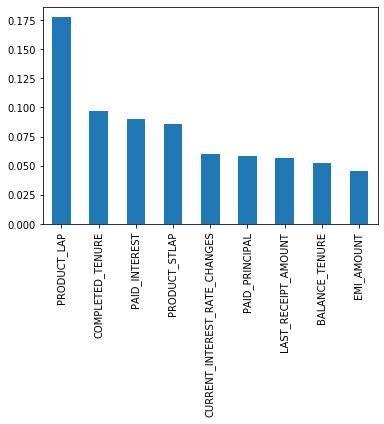

In [73]:
Imp_features.nlargest(9).plot(kind='bar')

In [75]:
y_pred_rf = RF_model.predict(X_test_new)

3. KNN model

In [76]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train_bal,y_train_bal)

KNeighborsClassifier()

In [77]:
KNN_model.score(X_test_new,y_test_new)

0.8240843507214206

In [78]:
KNN_model.score(X_train_bal,y_train_bal)

0.9426080166579907

In [79]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [80]:
gridsearch = GridSearchCV(KNN_model, param_grid,n_jobs=-1,verbose=3)

In [81]:
gridsearch.fit(X_train_bal,y_train_bal)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             verbose=3)

In [82]:
gridsearch.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 3}

In [83]:
KNN_model = KNeighborsClassifier(algorithm='ball_tree',leaf_size=18,n_neighbors=3)

In [84]:
KNN_model.fit(X_train_bal,y_train_bal)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=3)

In [85]:
KNN_model.score(X_test_new,y_test_new)

0.8485016648168702

In [86]:
KNN_model.score(X_train_bal,y_train_bal)

0.9619989588755856

# MODEL VALIDATION AND PERFORMANCE METRICS

In [87]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

1.Logistic Regression

In [88]:
##Confusion Matrix

conf_mat_log = confusion_matrix(y_test_new,Y_pred_log)
conf_mat_log

array([[1377,  284],
       [  16,  125]], dtype=int64)

In [89]:
true_positive = conf_mat_log[0][0]
false_positive = conf_mat_log[0][1]
false_negative = conf_mat_log[1][0]
true_negative = conf_mat_log[1][1]

In [90]:
accuracy_log = (true_positive+true_negative)/(true_positive+false_positive+false_negative+true_negative)
accuracy_log

0.8335183129855716

In [91]:
sensitivity_log = true_positive/(true_positive+false_negative)
sensitivity_log

0.9885139985642498

In [92]:
specificity_log = true_negative/(true_negative+false_positive)
specificity_log

0.3056234718826406

In [93]:
precision_log = true_positive/(true_positive+false_positive)
precision_log

0.8290186634557496

In [94]:
F1_score_log = 2*(sensitivity_log*precision_log)/(sensitivity_log+precision_log)
F1_score_log

0.9017681728880157

In [95]:
AUC_log = roc_auc_score(y_test_new,Y_pred_log)
AUC_log

0.8577717430753924

In [96]:
fpr, tpr, thresholds = roc_curve(y_test_new, Y_pred_log)

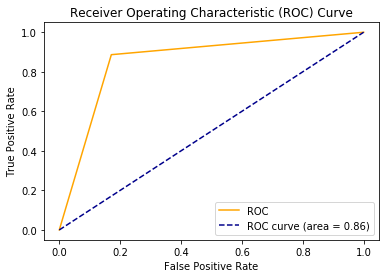

In [97]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % AUC_log)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

2. Random Forest

In [98]:
conf_mat_RF = confusion_matrix(y_test_new,y_pred_rf)
conf_mat_RF

array([[1610,   51],
       [  55,   86]], dtype=int64)

In [99]:
true_positive_rf = conf_mat_RF[0][0]
false_positive_rf = conf_mat_RF[0][1]
false_negative_rf = conf_mat_RF[1][0]
true_negative_rf = conf_mat_RF[1][1]

In [100]:
accuracy_RF = (true_positive_rf+true_negative_rf)/(true_positive_rf+false_positive_rf+false_negative_rf+true_negative_rf)
accuracy_RF

0.9411764705882353

In [101]:
sensitivity_RF = true_positive_rf/(true_positive_rf+false_negative_rf)
sensitivity_RF

0.9669669669669669

In [102]:
specificity_RF = true_negative_rf/(true_negative_rf+false_positive_rf)
specificity_RF

0.6277372262773723

In [103]:
precision_RF = true_positive_rf/(true_positive_rf+false_positive_rf)
precision_RF

0.9692956050571945

In [104]:
F1_score_RF = 2*(sensitivity_RF*precision_RF)/(sensitivity_RF+precision_RF)
F1_score_RF

0.9681298857486469

In [105]:
AUC_RF = roc_auc_score(y_test_new,y_pred_rf)
AUC_RF

0.7896123415356895

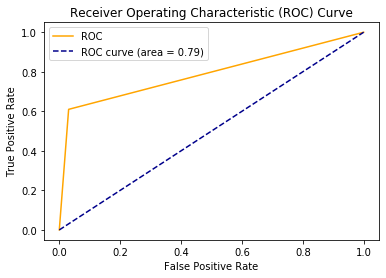

In [106]:
fpr, tpr, thresholds = roc_curve(y_test_new, y_pred_rf)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % AUC_RF)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

3. knn

In [107]:
y_pred_knn = KNN_model.predict(X_test_new)
conf_mat_knn = confusion_matrix(y_test_new,y_pred_knn)
conf_mat_knn

array([[1451,  210],
       [  63,   78]], dtype=int64)

In [108]:
true_positive_knn = conf_mat_knn[0][0]
false_positive_knn = conf_mat_knn[0][1]
false_negative_knn = conf_mat_knn[1][0]
true_negative_knn = conf_mat_knn[1][1]

In [109]:
accuracy_knn = (true_positive_knn+true_negative_knn)/(true_positive_knn+false_positive_knn+false_negative_knn+true_negative_knn)
accuracy_knn

0.8485016648168702

In [110]:
sensitivity_knn = true_positive_knn/(true_positive_knn+false_negative_knn)
sensitivity_knn

0.9583883751651255

In [111]:
specificity_knn = true_negative_knn/(true_negative_knn+false_positive_knn)
specificity_knn

0.2708333333333333

In [112]:
precision_knn = true_positive_knn/(true_positive_knn+false_positive_knn)
precision_knn

0.8735701384708007

In [113]:
F1_score_knn = 2*(sensitivity_knn*precision_knn)/(sensitivity_knn+precision_knn)
F1_score_knn

0.9140157480314961

In [114]:
AUC_knn = roc_auc_score(y_test_new,y_pred_knn)
AUC_knn

0.7133808139162515

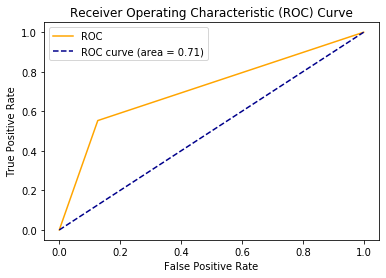

In [115]:
fpr, tpr, thresholds = roc_curve(y_test_new, y_pred_knn)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % AUC_knn)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [118]:
import pickle
with open('RFmodel.sav','wb') as f:
    pickle.dump(RF_model,f)
    
with open('Scalar.sav','wb') as f:
    pickle.dump(scaler,f)